## Modeling Networks

### Intro to the Twitter API

In order to use the Twitter API, you'll need:

* import oauth2 (pip install oauth2)
* A twitter account
* Twitter Consumer/Access tokens


## Creating your Twitter Consumer/Access Tokens

1) Go to https://apps.twitter.com/ and click **"Create New App"**

* Twitter assumes you're making tokens for an app, so let's make a dummy app.
 
2) Fill out **Name, Description and Website**:

* For **Website**, I just put my github/twitter link
* I left **Callback URL** empty
* Click **"Create your Twitter Application"**

3) Under **Application Settings**, set **Access level** to Read-only:

* You don't _have_ to do this, but it's good practice.

4) Notice that we're in the **Details** tab. Click on the **Keys and Access Tokens** tab:

* You'll see **Consumer Key (API Key)** and **Consumer Secret (API Secret)**. We'll copy those in a second.

5) Scroll to the bottom of the page and click the **"Create my access token"** button (under **Your Access Token > Token Actions**)

Keep this page open - we'll paste these values into a config file.

## Adding your Twitter API tokens into config.json

Using a text editor, open **config.json**, and paste your keys for the following:

* **CONSUMER_KEY** - replace **"[Consumer Key (API Key)]"** with your value for **"Consumer Key (API Key)"**
* **CONSUMER_SECRET**
* **ACCESS_TOKEN**
* **ACCESS_SECRET**

<img src="twitter-tokens.png" style="float:left" />



# Connecting to the Twitter API

Now we're ready to use the Twitter API!

In [6]:
import oauth2 as oauth
import json

with open('config.json') as f:
    tokens = json.loads(f.read())

consumer = oauth.Consumer(key=tokens['CONSUMER_KEY'], secret=tokens['CONSUMER_SECRET'])
token = oauth.Token(key=tokens['ACCESS_TOKEN'], secret=tokens['ACCESS_SECRET'])

client = oauth.Client(consumer, token)

# TODO: run this... should get an <OAuth2.Client> object connecting to Twitter's API
client

### Twitter's REST APIs

Twitter has a rich set of API calls (full list is listed at https://dev.twitter.com/rest/public). Today we'll be using these:

* [GET friends/list](https://dev.twitter.com/rest/reference/get/friends/list) - who is user X is following?
* [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) - who follows user X?



### GET followers/list: let's find out who follows you!

You'll see from the [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) documentation that the URL to get the list of followers is:

    https://api.twitter.com/1.1/followers/list.json?screen_name=[screen_name]
    
Which returns:

1) A response body

* JSON representing the data we requested

2) A response header

* There's a lot of stuff here, but one param to note are the **HTTP Response Codes**, which will tell you if the request was successful. Or if not, why. The ones you should note are:

* **200** - **STATUS_OKAY** - <font color="#009900">Success :) </font>. This is what you want.
* **429** - **RATE_LIMIT_EXCEEDED**. <font color="#990000">Uh-oh, slow it down :/</font>. Twitter limits how frequently you can make requests, and you've exceeded it.
* **401** - **UNAUTHORIZED_USER**. Twitter isn't accepting your Consumer/Access tokens. Verify tokens were pasted correctly, or try generating new tokens.

&nbsp;
 
Now that we know what to expect, let's try it!

In [17]:
import json


FOLLOWERS_URL = 'https://api.twitter.com/1.1/followers/list.json'

#  TODO: put your twitter handle here
screen_name = 'donwan2011'


url = FOLLOWERS_URL + '?screen_name=' + screen_name
header, response = client.request(url, method='GET')
    

In [18]:
print('status:',header['status']) 
               
# should be 200 (STATUS_OKAY)
print(response[:600]) # a lot of data!

status: 200
b'{"users":[{"id":336519357,"id_str":"336519357","name":"StepheTsatsu Anyigba","screen_name":"Kadinale","location":"Ghana","description":"Gentleman, loves choral music and investments. Also into health care and events management.","url":null,"entities":{"description":{"urls":[]}},"protected":false,"followers_count":163,"friends_count":660,"listed_count":1,"created_at":"Sat Jul 16 12:45:35 +0000 2011","favourites_count":16,"utc_offset":null,"time_zone":null,"geo_enabled":false,"verified":false,"statuses_count":603,"lang":"en","status":{"created_at":"Tue Dec 15 09:31:30 +0000 2015","id":6766960730'


## Working with Twitter Retweets Data

In [134]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

edgelist_txt = 'retweets.txt'
G = nx.read_edgelist(edgelist_txt, create_using=nx.DiGraph())

print(edgelist_text)

['PyTennessee']


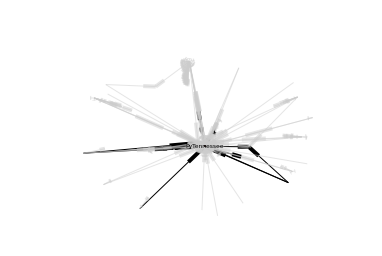

In [133]:
LAYOUTS = {
    'circular': nx.circular_layout,
    'fr': nx.fruchterman_reingold_layout,
    'random': nx.random_layout,
    'shell': nx.shell_layout,
    'spectral': nx.spectral_layout,
    'spring': nx.spring_layout
}

def save_layout(G, layout_name):
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1.5]
    nlarge=[n for n in G.nodes() if n in ['PyTennessee']]
    pos=LAYOUTS[layout_name](G) # positions for all nodes

    print (nlarge)
    # nodes
    nx.draw_networkx_nodes(G,pos,nodelist=nlarge,node_size=1)

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.5,edge_color='#cccccc')

    # labelsM
    labels={}
    labels['PyTennessee']='PyTennessee'
    nx.draw_networkx_labels(G,pos,labels,font_size=6)
    #nx.draw_networkx_labels(G,pos,nodelist=nlarge,font_size=6,font_family='sans-serif')
    
    
    plt.axis('off')
    plt.figure(figsize=(20,10))
    plt.savefig(layout_name + '.png', dpi=500)
    plt.show()
save_layout(G,'spring')

['PyTennessee']


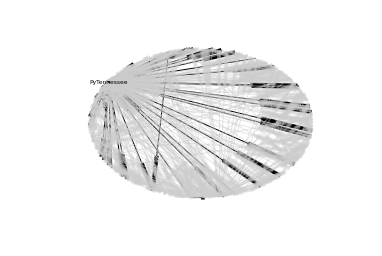

In [132]:
save_layout(G,'circular')

['PyTennessee']


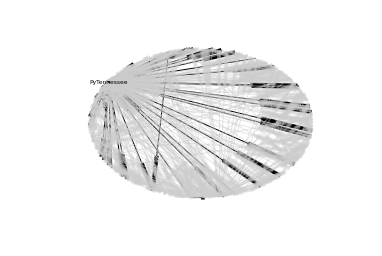

In [127]:
save_layout(G,'shell')

['PyTennessee']


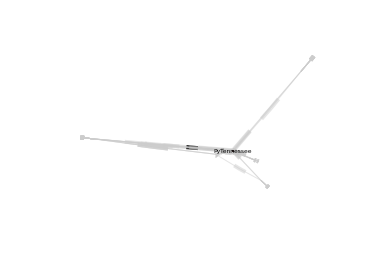

In [136]:
save_layout(G,'spectral')

['PyTennessee']


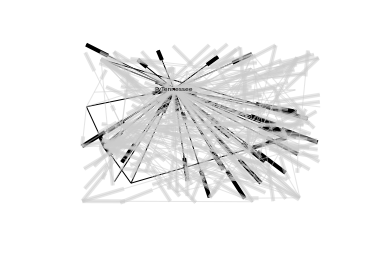

In [135]:
save_layout(G,'random')

['PyTennessee']


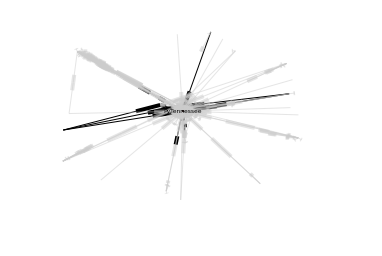

In [130]:
save_layout(G,'fr')

#### Thanks to Pycon 2015 Team :Sarah Guido, Celia La